<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [204]:
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [205]:
df.shape


(14999, 10)

In [206]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [207]:
df.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [208]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [209]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [210]:
#to count the number of peaple left the company or not 
left_count = pd.DataFrame(df["left"].value_counts())
left_count


,left
0,11428
1,3571


([<matplotlib.patches.Wedge at 0x226ab6ff880>,
 [Text(-0.9530027393367159, 0.8841865068053887, 'No'),
  Text(0.8063869683087074, -0.7481577757010162, 'Yes')])

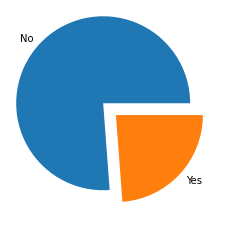

In [211]:
#creating the pie chat 
plt.pie(left_count["left"],labels=["No","Yes"],explode = (0.2,0))


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left', ylabel='count'>

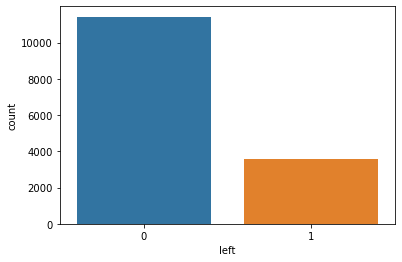

In [212]:
#count plot
sns.countplot(df["left"])

In [213]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


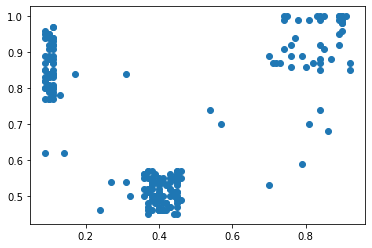

In [214]:
plt.scatter(df[:200]["satisfaction_level"],df[:200]["last_evaluation"])

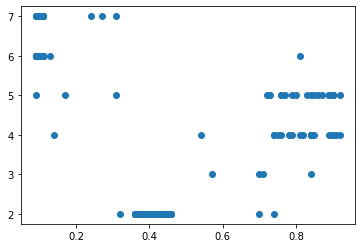

In [215]:
plt.scatter(df[:200]["satisfaction_level"],df[:200]["number_project"])

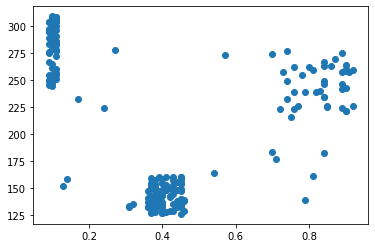

In [216]:
plt.scatter(df[:200]["satisfaction_level"],df[:200]["average_montly_hours"])

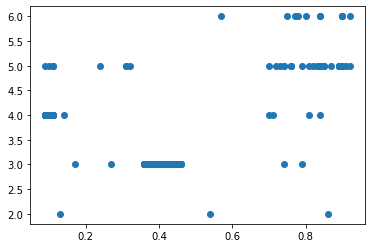

In [217]:
plt.scatter(df[:200]["satisfaction_level"],df[:200]["time_spend_company"])

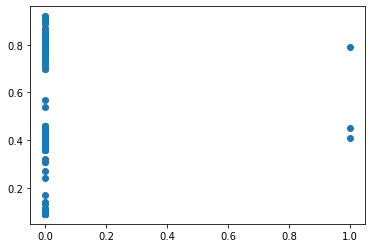

In [218]:
plt.scatter(df[:200]["promotion_last_5years"],df[:200]["satisfaction_level"])

In [219]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [220]:
salary_dummies = pd.get_dummies(df["salary"]) 
salary_dummies


,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [221]:
df = pd.concat([df,salary_dummies], axis = "columns")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [222]:
df = df.drop(["high"] , axis ="columns")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,1,0


In [223]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,1,0


In [224]:
#sns.barplot(x = "Department",y= 1,data = df)

<AxesSubplot:>

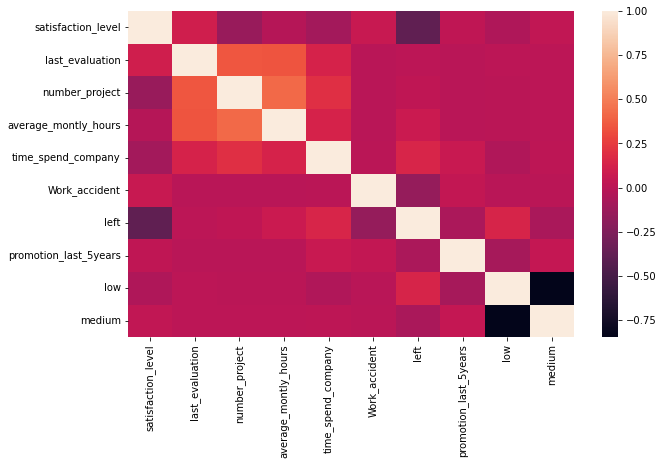

In [225]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr())

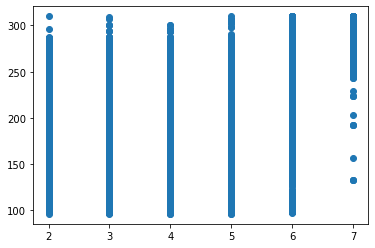

In [226]:
plt.scatter(df["number_project"],df["average_montly_hours"])

# Data preprocessing part

convert String columns into integers 

In [227]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if(df[column].dtype == np.number):
        continue
    else:
        df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23624\759981594.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if(df[column].dtype == np.number):


# Model Building  

In [242]:
from sklearn.model_selection import train_test_split


In [243]:
X = df.drop("left",axis = "columns")
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,low,medium
0,0.38,0.53,0,61,1,0,0,7,1,1,0
1,0.80,0.86,3,166,4,0,0,7,2,0,1
2,0.11,0.88,5,176,2,0,0,7,2,0,1
3,0.72,0.87,3,127,3,0,0,7,1,1,0
4,0.37,0.52,0,63,1,0,0,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,0,55,1,0,0,8,1,1,0
14995,0.37,0.48,0,64,1,0,0,8,1,1,0
14996,0.37,0.53,0,47,1,0,0,8,1,1,0
14997,0.11,0.96,4,184,2,0,0,8,1,1,0


In [244]:
y =df["left"]
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [273]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state =10)


In [274]:
#create object of Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [275]:
model.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [281]:
X_test[:20]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,low,medium
13982,0.65,0.40,3,29,2,0,0,7,1,1,0
822,0.41,0.50,0,32,1,0,0,4,1,1,0
13751,0.44,0.41,1,29,5,0,0,7,2,0,1
9656,0.93,0.44,3,94,3,0,0,9,2,0,1
13497,0.76,0.82,2,74,4,0,0,7,2,0,1
1570,0.40,0.48,0,43,1,0,0,9,1,1,0
13024,0.76,0.88,3,169,2,0,0,8,1,1,0
6110,0.86,0.56,3,141,1,0,0,9,1,1,0
3201,0.67,0.55,1,121,0,0,0,1,0,0,0
9359,0.97,0.54,1,175,1,0,0,8,2,0,1


In [277]:
model.predict(X_test[:20])


array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [278]:
model.score(X_test,y_test)

0.7924444444444444

In [282]:
y_test[:20]

13982    0
822      1
13751    0
9656     0
13497    0
1570     1
13024    0
6110     0
3201     0
9359     0
6630     0
14371    1
10182    0
10240    0
5732     0
2902     0
3601     0
9033     0
1793     1
10407    0
Name: left, dtype: int64